In [3]:
import numpy as np
import pandas as pd
from scipy import stats, optimize, integrate
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("NED_DATA - Sheet2.csv")

In [5]:
df.info

<bound method DataFrame.info of                     Galaxy Name      m-M    err  D (Mpc)    Method  \
0                    GRB 021004  46.48**    1.8     4331       GRB   
1                    GRB 021004   46.45*   0.52     5873       GRB   
2                    GRB 050824   43.35*   1.29     2556       GRB   
3                      CDFa C01  45.77**   1.58     2464    HII LF   
4                    GRB 050904   49.34*   0.53    10122       GRB   
..                          ...      ...    ...      ...       ...   
115              MS 0737.9+7441   41.04*  . . .     1228  BL Lac M   
116  H-ZSNS J074855.70+100606.3   42.02*   0.17     1781      SNIa   
117  H-ZSNS J075013.53+101710.4   40.89*    0.3     1079      SNIa   
118  H-ZSNS J075031.24+102107.3   43.99*   0.38     3244      SNIa   
119  H-ZSNS J075035.90+095814.2   43.90*    0.3     3202      SNIa   

                 REFCODE                  Notes       RA  Dec   GLON  GLAT  \
0    2006astro.ph..9262M    z = 2.332, h = 0.73  

In [7]:
distance= df["D (Mpc)"]
print(distance)

0       4331
1       5873
2       2556
3       2464
4      10122
       ...  
115     1228
116     1781
117     1079
118     3244
119     3202
Name: D (Mpc), Length: 120, dtype: int64


In [8]:
velocity= df["V helio (z) (km/s)"]
print(velocity)

0      250249
1      250249
2      161922
3      266281
4      288711
        ...  
115     80102
116    101578
117     96558
118    173513
119    167781
Name: V helio (z) (km/s), Length: 120, dtype: object


In [28]:
dist_col = "D (Mpc)"
vel_col = "V helio (z) (km/s)"

Total galaxies: 119


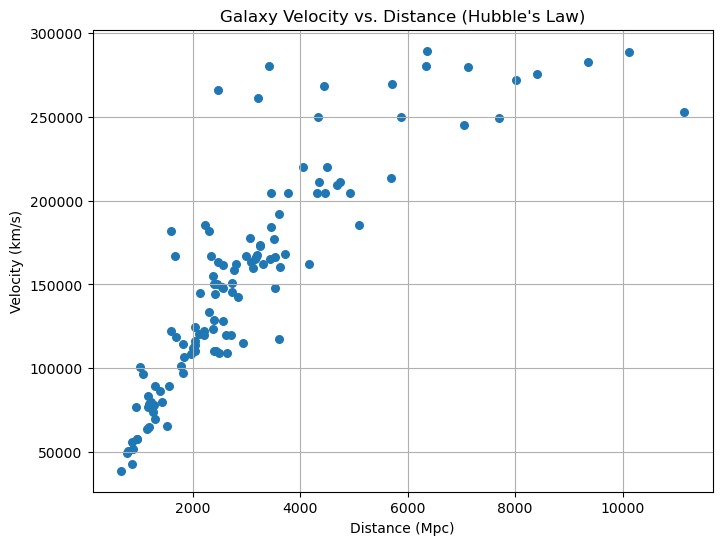

In [29]:
df[dist_col] = pd.to_numeric(df[dist_col], errors="coerce")
df[vel_col] = pd.to_numeric(df[vel_col], errors="coerce")

# Drop rows with missing values
df_clean = df.dropna(subset=[dist_col, vel_col])

print("Total galaxies:", len(df_clean))

# Plot without filtering
plt.figure(figsize=(8, 6))
plt.scatter(df_clean[dist_col], df_clean[vel_col], s=30)

plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Galaxy Velocity vs. Distance (Hubble's Law)")
plt.grid(True)
plt.show()

Best-fit H0: 27.47 ± 1.63 km/s/Mpc
Intercept: 68577.10 ± 5921.00 km/s


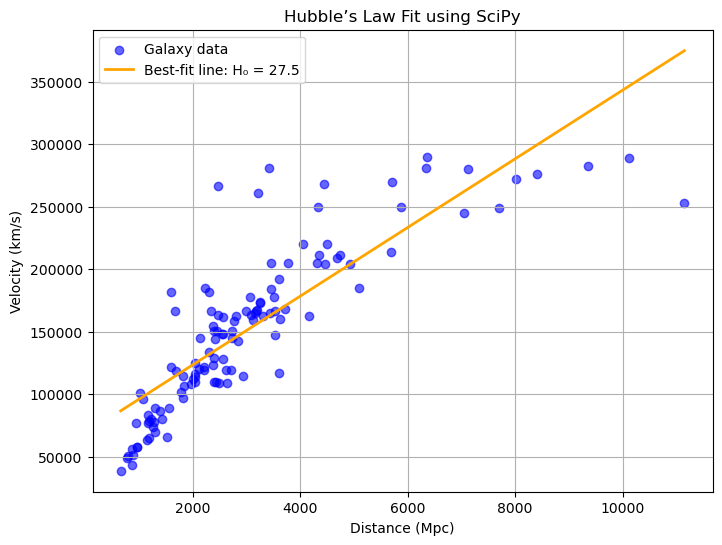

In [35]:
df[dist_col] = pd.to_numeric(df[dist_col], errors="coerce")
df[vel_col] = pd.to_numeric(df[vel_col], errors="coerce")

#remove invalid rows
df_clean = df.dropna(subset=[dist_col, vel_col])

# Values for curve fit
d = df_clean[dist_col].values
v = df_clean[vel_col].values

#Model
def hubble_law(distance, H0, intercept):
    return H0 * distance + intercept

# fit
popt, pcov = optimize.curve_fit(hubble_law, d, v)

H0_fit, intercept_fit = popt
H0_uncertainty, intercept_uncertainty = np.sqrt(np.diag(pcov))

print(f"Best-fit H0: {H0_fit:.2f} ± {H0_uncertainty:.2f} km/s/Mpc")
print(f"Intercept: {intercept_fit:.2f} ± {intercept_uncertainty:.2f} km/s")

#plotting
plt.figure(figsize=(8, 6))
plt.scatter(d, v, color="blue", alpha=0.6, label="Galaxy data")

# Sorted distances so the line plots cleanly
d_sorted = np.sort(d)
plt.plot(d_sorted, hubble_law(d_sorted, *popt),
         color="orange", linewidth=2,
         label=f"Best-fit line: H₀ = {H0_fit:.1f}")

plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Hubble’s Law Fit using SciPy")
plt.legend()
plt.grid(True)
plt.show()